In [ ]:
이from google.colab import drive
drive.mount('/content/drive')

SyntaxError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import tensorflow as tf
tf.__version__

'2.3.0'

In [ ]:
if tf.__version__ != '1.15.0':
    !pip uninstall tensorflow

Uninstalling tensorflow-2.3.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.6/dist-packages/tensorflow-2.3.0.dist-info/*
    /usr/local/lib/python3.6/dist-packages/tensorflow/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-2.3.0


In [ ]:
!pip install tensorflow==1.15.0

     |████████████████████████████████| 412.3MB 28kB/s 
     |████████████████████████████████| 3.8MB 41.7MB/s 
     |████████████████████████████████| 512kB 16.6MB/s 
     |████████████████████████████████| 51kB 5.7MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7542 sha256=52afef237435ddcfd99639f023c0da75a4d201135a86033b58396f5a7cc932c8
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.11.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorboard 2.3.0
    Uninstalling tensorboard-2.3.0:
      Successfully uninstalled tensorboard-2.3.0
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorflow-estimator 2.3.0
    Uninstalling tensorflow-estimator-2.3.0:
      Successfully uninstalled tens

[0.8705346719589073 0.6503412778430183 0.080393296423856
 0.007153327363744189 0.0]
--
[0.8705346719589073]
--
[[0.8705346719589073 0.6503412778430183 0.080393296423856
  0.007153327363744189 0.0]
 [0.8395984123278076 0.6795757942192052 0.080393296423856
  0.2057287237230281 0.0005017529700052872]
 [0.08829480893454744 0.708927248660897 0.0 0.6036738180270458
  0.0015087731898267994]] -> [0.11230445949101098]
 -- 
X:  Tensor("Placeholder:0", shape=(?, 3, 5), dtype=float32)
Y:  Tensor("Placeholder_1:0", shape=(?, 1), dtype=float32)
targets:  Tensor("Placeholder_2:0", shape=(?, 1), dtype=float32)
predictions:  Tensor("Placeholder_3:0", shape=(?, 1), dtype=float32)
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not li

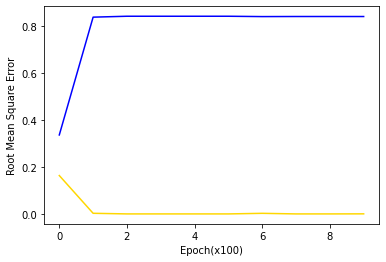

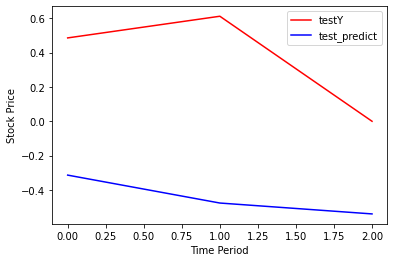

In [ ]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib
import os
import csv
import matplotlib.pyplot as plt

# 랜덤에 의해 똑같은 결과를 재현하도록 시드 설정
# 하이퍼파라미터를 튜닝하기 위한 용도(흔들리면 무엇때문에 좋아졌는지 알기 어려움)
tf.set_random_seed(777)

# 하이퍼파라미터
input_data_column_cnt = 5  # 입력데이터의 컬럼 개수(Variable 개수)
output_data_column_cnt = 1 # 결과데이터의 컬럼 개수

seq_length=3           # 1개의 시퀀스의 길이(시게열데이터 입력 개수)
rnn_cell_hidden_dim=8 # 각 셀의 출력 크기
forget_bias=1.0        # 망각편향(기본값 1.0)
num_stacked_layers=1   # LSTM 개수
keep_prob=1.0          # dropout할 때 keep할 비율

epoch_num=1000     # 에폭 횟수(학습용 전체 데이터를 몇 회 반복해서 학습할 것인가 입력))
learning_rate=0.01

def MinMaxScaler(data):
  #데이터 모든 숫자들의 최소 값만큼 뺀다.
  numerator=data-np.min(data,0)
  #최대값과 최소 값의 차이를 구한다.
  denominator=np.max(data,0)-np.min(data,0)
  result=numerator/(denominator)
  return result

def data_change(x):
  x_data=[]

  for i in range(len(x[:])):

    if(i==0):
      init=100+100*x[i]/100
      x_data.append([init[0]])
      
    else:
      init=init+init*x[i]/100
      x_data.append([init[0]])
    
  return x_data


# Standardization
def data_standardization(x):
    x_np = np.asarray(x)
    return (x_np - x_np.mean()) / x_np.std()

def reverse_data_standardization(org_x, x):
    org_x_np = np.asarray(org_x)
    x_np = np.asarray(x)
    return ((x_np * org_x_np.std()) + org_x_np.mean())

# 너무 작거나 너무 큰 값이 학습을 방해하는 것을 방지하고자 정규화한다
# x가 양수라는 가정하에 최소값과 최대값을 이용하여 0~1사이의 값으로 변환
# Min-Max scaling
def min_max_scaling(x):
    x_np = np.asarray(x)
    return (x_np - x_np.min()) / (x_np.max() - x_np.min() + 1e-7) # 1e-7은 0으로 나누는 오류 예방차원

# 정규화된 값을 원래의 값으로 되돌린다
# 정규화하기 이전의 org_x값과 되돌리고 싶은 x를 입력하면 역정규화된 값을 리턴한다
def reverse_min_max_scaling(org_x, x):
    org_x_np = np.asarray(org_x)
    x_np = np.asarray(x)
    return (x_np * (org_x_np.max() - org_x_np.min() + 1e-7)) + org_x_np.min()


card=pd.read_csv('/content/drive/My Drive/카드경제지표.csv', encoding='UTF-8')
card_np=card.values
x=card_np[:,[1,2,3,4,5]]
y=card_np[:,[1]]
price=card_np[:,[1]]

#x=min_max_scaling(x)
#y=min_max_scaling(y)

x_1=data_change(x[:,[1]])
x_2=data_change(x[:,[2]])
x_3=data_change(x[:,[3]])
x_4=data_change(x[:,[4]])
x = np.concatenate((x,x_1,x_2,x_3,x_4), axis=1) 

x=x[:,[0,5,6,7,8]]

print(x)
print(y)

x=MinMaxScaler(x)
y=MinMaxScaler(y)


print(x[0])
print('--')
print(y[0])
print('--')

dataX=[]
dataY=[]

for i in range(0, len(y)-seq_length):
  _x=x[i:i+seq_length]
  _y=y[i+seq_length]    #다음 달 소비 예측

  if i is 0:
    print(_x, "->", _y)
    print(" -- ")

  dataX.append(_x)
  dataY.append(_y)

# 학습용/테스트용 데이터 생성
# 전체 70%를 학습용 데이터로 사용
train_size = int(len(dataY) * 0.7)
# 나머지(30%)를 테스트용 데이터로 사용
test_size = len(dataY) - train_size
 
# 데이터를 잘라 학습용 데이터 생성
trainX = np.array(dataX[0:train_size])
trainY = np.array(dataY[0:train_size])
 
# 데이터를 잘라 테스트용 데이터 생성
testX = np.array(dataX[train_size:len(dataX)])
testY = np.array(dataY[train_size:len(dataY)])

# 텐서플로우 플레이스홀더 생성
# 입력 X, 출력 Y를 생성한다
X = tf.placeholder(tf.float32, [None, seq_length, input_data_column_cnt])
print("X: ", X)
Y = tf.placeholder(tf.float32, [None, 1])
print("Y: ", Y)
 
# 검증용 측정지표를 산출하기 위한 targets, predictions를 생성한다
targets = tf.placeholder(tf.float32, [None, 1])
print("targets: ", targets)
 
predictions = tf.placeholder(tf.float32, [None, 1])
print("predictions: ", predictions)

# 모델(LSTM 네트워크) 생성
def lstm_cell():
    # LSTM셀을 생성
    # num_units: 각 Cell 출력 크기
    # forget_bias:  to the biases of the forget gate 
    #              (default: 1)  in order to reduce the scale of forgetting in the beginning of the training.
    # state_is_tuple: True ==> accepted and returned states are 2-tuples of the c_state and m_state.
    # state_is_tuple: False ==> they are concatenated along the column axis.
    cell = tf.contrib.rnn.BasicLSTMCell(num_units=rnn_cell_hidden_dim, 
                                        forget_bias=forget_bias, state_is_tuple=True, activation=tf.nn.softsign)
    if keep_prob < 1.0:
        cell = tf.contrib.rnn.DropoutWrapper(cell, output_keep_prob=keep_prob)
    return cell

# num_stacked_layers개의 층으로 쌓인 Stacked RNNs 생성
stackedRNNs = [lstm_cell() for _ in range(num_stacked_layers)]
multi_cells = tf.contrib.rnn.MultiRNNCell(stackedRNNs, state_is_tuple=True) if num_stacked_layers > 1 else lstm_cell()

# RNN Cell(여기서는 LSTM셀임)들을 연결
hypothesis, _states = tf.nn.dynamic_rnn(multi_cells, X, dtype=tf.float32)
print("hypothesis: ", hypothesis)

# [:, -1]를 잘 살펴보자. LSTM RNN의 마지막 (hidden)출력만을 사용했다.
# 과거 여러 거래일의 주가를 이용해서 다음날의 주가 1개를 예측하기때문에 MANY-TO-ONE형태이다
hypothesis = tf.contrib.layers.fully_connected(hypothesis[:, -1], output_data_column_cnt, activation_fn=tf.identity)

# 손실함수로 평균제곱오차를 사용한다
loss = tf.reduce_sum(tf.square(hypothesis - Y))
# 최적화함수로 AdamOptimizer를 사용한다
optimizer = tf.train.AdamOptimizer(learning_rate)
# optimizer = tf.train.RMSPropOptimizer(learning_rate) # LSTM과 궁합 별로임
 
train = optimizer.minimize(loss)

# RMSE(Root Mean Square Error)
# 제곱오차의 평균을 구하고 다시 제곱근을 구하면 평균 오차가 나온다
# rmse = tf.sqrt(tf.reduce_mean(tf.square(targets-predictions))) # 아래 코드와 같다
rmse = tf.sqrt(tf.reduce_mean(tf.squared_difference(targets, predictions)))

train_error_summary = [] # 학습용 데이터의 오류를 중간 중간 기록한다
test_error_summary = []  # 테스트용 데이터의 오류를 중간 중간 기록한다
test_predict = ''        # 테스트용데이터로 예측한 결과
 
sess = tf.Session()
sess.run(tf.global_variables_initializer())

import datetime

# 학습한다
start_time = datetime.datetime.now() # 시작시간을 기록한다
print('학습을 시작합니다...')
for epoch in range(1000):
    _, _loss = sess.run([train, loss], feed_dict={X: trainX, Y: trainY})
    if ((epoch+1) % 100 == 0) or (epoch == epoch_num-1): # 100번째마다 또는 마지막 epoch인 경우
        # 학습용데이터로 rmse오차를 구한다
        train_predict = sess.run(hypothesis, feed_dict={X: trainX})
        train_error = sess.run(rmse, feed_dict={targets: trainY, predictions: train_predict})
        train_error_summary.append(train_error)
 
        # 테스트용데이터로 rmse오차를 구한다
        test_predict = sess.run(hypothesis, feed_dict={X: testX})
        test_error = sess.run(rmse, feed_dict={targets: testY, predictions: test_predict})
        test_error_summary.append(test_error)
        
        # 현재 오류를 출력한다
        print("epoch: {}, train_error(A): {}, test_error(B): {}, B-A: {}".format(epoch+1, train_error, test_error, test_error-train_error))
        
end_time = datetime.datetime.now() # 종료시간을 기록한다
elapsed_time = end_time - start_time # 경과시간을 구한다
print('elapsed_time:',elapsed_time)
print('elapsed_time per epoch:',elapsed_time/epoch_num)

# 결과 그래프 출력
plt.figure(1)
plt.plot(train_error_summary, 'gold')
plt.plot(test_error_summary, 'b')
plt.xlabel('Epoch(x100)')
plt.ylabel('Root Mean Square Error')
 
plt.figure(2)
plt.plot(testY, 'r', label='testY')
plt.plot(test_predict, 'b', label='test_predict')
plt.legend()
plt.xlabel('Time Period')
plt.ylabel('Stock Price')
plt.show()

In [ ]:
x

array([[0.8705346719589073, 0.080393296423856, 0.007153327363744189, 0.0],
       [0.8395984123278076, 0.080393296423856, 0.2057287237230281,
        0.0005017529700052872],
       [0.08829480893454744, 0.0, 0.6036738180270458,
        0.0015087731898267994],
       [0.11230445949101098, 0.0, 0.8034422553676581,
        0.0035218126332991736],
       [0.875048641917659, 0.040035861619080806, 0.20293833272177292,
        0.007557952695404454],
       [1.0, 0.1804416283171954, 0.40190529909177763,
        0.015642341239801332],
       [0.6707136742158923, 0.48341721488505573, 1.0,
        0.03193223907301847],
       [0.589578955560744, 0.708932043153732, 1.0, 0.0645289058427587],
       [0.711067009105767, 0.9162006716806718, 0.7994389102954396,
        0.12806435020618417],
       [0.4854463382364386, 0.9371348031618929, 0.1989590077199942,
        0.25367392371267633],
       [0.611604015876722, 0.9371348031618929, 0.0, 0.5040374599665146],
       [0.0, 1.0, 0.19856108970455358, 1.0]]

In [ ]:
# sequence length만큼의 가장 최근 데이터를 슬라이싱한다
recent_data = np.array([x[len(x)-seq_length : ]])
print("recent_data.shape:", recent_data.shape)
print("recent_data:", recent_data)

test_predict = sess.run(hypothesis, feed_dict={X: recent_data})
print("test_predict", test_predict[0])
test_predict=reverse_data_standardization(price,test_predict)
print("test_predict(역정규화)", test_predict[0])
print("원래의 데이터: ",price[-1])

recent_data.shape: (1, 3, 2)
recent_data: [[[0.4356139826710487 0.25367392371267633]
  [0.5739895001920696 0.5040374599665146]
  [0.7683213111955269 1.0]]]
test_predict [1.5471048]
test_predict(역정규화) [925183.6]
원래의 데이터:  [854370]


In [ ]:
card=pd.read_csv('/content/drive/My Drive/카드경제지표.csv', encoding='UTF-8')
card_np=card.values
x=card_np[:,[1,2,3,4,5]]
x

array([[875380, 0.4, 0.6, -0.3, 99.9],
       [867430, 0.4, 0.0, 0.2, 99.9],
       [674360, 0.4, -0.4, 0.4, 100.3],
       [680530, 1.3, 0.0, 0.2, 100.1],
       [876540, 1.3, 0.2, -0.6, 100.3],
       [908650, 1.3, 0.7, 0.2, 100.3],
       [643280, -1.3, 1.5, 0.6, 100.9],
       [754330, -1.3, 1.1, 0.0, 100.5],
       [834400, -1.3, 1.0, -0.2, 97.7],
       [776420, -3.3, 0.1, -0.6, 97.7],
       [808840, -3.3, 0.0, -0.2, 98.5],
       [651670, -3.3, 0.3, 0.2, 98.3]], dtype=object)

In [ ]:
def data_change(x):
  x_data=[]

  for i in range(len(x[:])):

    if(i==0):
      init=100+100*x[i]/100
      x_data.append([init[0]])
      
    else:
      init=init+init*x[i]/100
      x_data.append([init[0]])
    
  return x_data

In [ ]:
x_1=data_change(x[:,[1]])
x_1

In [ ]:
x_2=data_change(x[:,[2]])
x_2

In [ ]:
x_3=data_change(x[:,[3]])
x_3

In [ ]:
x_4=data_change(x[:,[4]])
x_4

In [ ]:
x = np.concatenate((x,x_1,x_2,x_3,x_4), axis=1) 

In [ ]:
x[:,[0,5,6,7,8]]

In [ ]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib
import os
import csv
import matplotlib.pyplot as plt

# 랜덤에 의해 똑같은 결과를 재현하도록 시드 설정
# 하이퍼파라미터를 튜닝하기 위한 용도(흔들리면 무엇때문에 좋아졌는지 알기 어려움)
tf.set_random_seed(777)

# 하이퍼파라미터
input_data_column_cnt = 5  # 입력데이터의 컬럼 개수(Variable 개수)
output_data_column_cnt = 1 # 결과데이터의 컬럼 개수

seq_length=3           # 1개의 시퀀스의 길이(시게열데이터 입력 개수)
rnn_cell_hidden_dim=10 # 각 셀의 출력 크기
forget_bias=1.0        # 망각편향(기본값 1.0)
num_stacked_layers=1   # LSTM 개수
keep_prob=1.0          # dropout할 때 keep할 비율

epoch_num=1000     # 에폭 횟수(학습용 전체 데이터를 몇 회 반복해서 학습할 것인가 입력))
learning_rate=0.01


def data_change(x):
  x_data=[]

  for i in range(len(x[:])):

    if(i==0):
      init=100+100*x[i]/100
      x_data.append([init[0]])
      
    else:
      init=init+init*x[i]/100
      x_data.append([init[0]])
    
  return x_data


# Standardization
def data_standardization(x):
    x_np = np.asarray(x)
    return (x_np - x_np.mean()) / x_np.std()

def reverse_data_standardization(org_x, x):
    org_x_np = np.asarray(org_x)
    x_np = np.asarray(x)
    return ((x_np * org_x_np.std()) + org_x_np.mean())

# 너무 작거나 너무 큰 값이 학습을 방해하는 것을 방지하고자 정규화한다
# x가 양수라는 가정하에 최소값과 최대값을 이용하여 0~1사이의 값으로 변환
# Min-Max scaling
def min_max_scaling(x):
    x_np = np.asarray(x)
    return (x_np - x_np.min()) / (x_np.max() - x_np.min() + 1e-7) # 1e-7은 0으로 나누는 오류 예방차원

# 정규화된 값을 원래의 값으로 되돌린다
# 정규화하기 이전의 org_x값과 되돌리고 싶은 x를 입력하면 역정규화된 값을 리턴한다
def reverse_min_max_scaling(org_x, x):
    org_x_np = np.asarray(org_x)
    x_np = np.asarray(x)
    return (x_np * (org_x_np.max() - org_x_np.min() + 1e-7)) + org_x_np.min()


card=pd.read_csv('/content/drive/My Drive/카드경제지표.csv', encoding='UTF-8')
card_np=card.values
x=card_np[:,[1,2,3,4,5]]
y=card_np[:,[1]]
price=card_np[:,[1]]

#x=min_max_scaling(x)
#y=min_max_scaling(y)

x_1=data_change(x[:,[1]])
x_2=data_change(x[:,[2]])
x_3=data_change(x[:,[3]])
x_4=x[:,[4]]
x = np.concatenate((x,x_1,x_2,x_3,x_4), axis=1) 

x=x[:,[0,5,6,7,8]]

In [ ]:
x

array([[875380, 100.4, 100.6, 99.7, 99.9],
       [867430, 100.80160000000001, 100.6, 99.8994, 99.9],
       [674360, 101.20480640000001, 100.1976, 100.2989976, 100.3],
       [680530, 102.52046888320001, 100.1976, 100.4995955952, 100.1],
       [876540, 103.85323497868161, 100.3979952, 99.8965980216288, 100.3],
       [908650, 105.20332703340448, 101.1007811664, 100.09639121767206,
        100.3],
       [643280, 103.83568378197022, 102.617292883896, 100.69696956497809,
        100.9],
       [754330, 102.4858198928046, 103.74608310561885,
        100.69696956497809, 100.5],
       [834400, 101.15350423419814, 104.78354393667504,
        100.49557562584813, 97.7],
       [776420, 97.8154385944696, 104.88832748061172, 99.89260217209305,
        97.7],
       [808840, 94.5875291208521, 104.88832748061172, 99.69281696774887,
        98.5],
       [651670, 91.46614065986398, 105.20299246305356, 99.89220260168436,
        98.3]], dtype=object)

In [ ]:
x_1=min_max_scaling(x[:,[1]])
x_1

array([[0.6503412731088518],
       [0.6795757892722258],
       [0.7089272435002533],
       [0.8047010386463065],
       [0.9017198931292585],
       [0.999999992720489],
       [0.9004422518345727],
       [0.802178761580173],
       [0.7051926966990807],
       [0.46219784137276887],
       [0.22722181627222515],
       [0.0]], dtype=object)

In [ ]:
x_2=min_max_scaling(x[:,[2]])
x_2

array([[0.0803932948177223],
       [0.0803932948177223],
       [0.0],
       [0.0],
       [0.04003586081922622],
       [0.1804416247122508],
       [0.4834172052271276],
       [0.7089320289903664],
       [0.9162006533763997],
       [0.9371347844393892],
       [0.9371347844393892],
       [0.999999980021547]], dtype=object)

In [ ]:
def MinMaxScaler(data):
  #데이터 모든 숫자들의 최소 값만큼 뺀다.
  numerator=data-np.min(data,0)
  #최대값과 최소 값의 차이를 구한다.
  denominator=np.max(data,0)-np.min(data,0)
  result=numerator/(denominator)
  return result

In [ ]:
x=MinMaxScaler(x)
x[:,[0]]

array([[0.8746278780570524],
       [0.8446697064476014],
       [0.11711949353732524],
       [0.1403700493650375],
       [0.8789991332856012],
       [1.0],
       [0.0],
       [0.41847232166409165],
       [0.7202019821381468],
       [0.5017145871801636],
       [0.6238836341711572],
       [0.0316162339375212]], dtype=object)

In [ ]:
x[:,[1]]

array([[0.6503412778430183],
       [0.6795757942192052],
       [0.708927248660897],
       [0.8047010445041366],
       [0.9017198996933384],
       [1.0],
       [0.900442258389352],
       [0.8021787674196421],
       [0.7051927018325387],
       [0.46219784473734316],
       [0.22722181792628884],
       [0.0]], dtype=object)

In [ ]:
x[:,[2]]

array([[0.080393296423856],
       [0.080393296423856],
       [0.0],
       [0.0],
       [0.040035861619080806],
       [0.1804416283171954],
       [0.48341721488505573],
       [0.708932043153732],
       [0.9162006716806718],
       [0.9371348031618929],
       [0.9371348031618929],
       [1.0]], dtype=object)

In [ ]:
import numpy as np

In [ ]:
a=np.array([1,2,3])
a[0]

1

In [ ]:
a.

array([1, 2, 3])